In [1]:
import numpy as np
import pandas as pd

In [2]:
from tensorflow.keras.datasets import fashion_mnist

In [3]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

In [4]:
X_train.shape

(60000, 28, 28)

In [5]:
X_test.shape

(10000, 28, 28)

In [6]:
import matplotlib.pyplot as plt

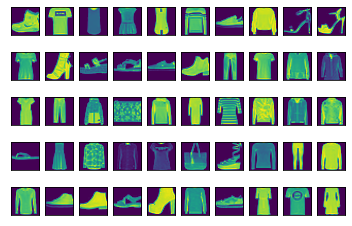

In [7]:
for digit_num in range(0,50):
    plt.subplot(5,10, digit_num+1)
    mat_data = X_train[digit_num].reshape(28,28)
    plt.imshow(mat_data)
    plt.xticks([])
    plt.yticks([])

In [8]:
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [9]:
X_train = X_train/255
X_test = X_test/255

In [10]:
X_train = X_train.reshape(X_train.shape[0], 28*28)
X_test = X_test.reshape(X_test.shape[0], 28*28)

In [11]:
X_train.shape

(60000, 784)

In [12]:
X_train[0:5]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [31]:
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization
from tensorflow.keras.optimizers import Adam, RMSprop, Adagrad

In [32]:
model = Sequential()

In [33]:
# First Hidden Layer
model.add(Dense(units=128, 
                activation='relu', 
                input_shape=(784,)))
model.add(BatchNormalization())

# Second Hidden Layer
model.add(Dense(units=64, 
                activation='tanh'))
# Third Hidden layer
model.add(Dense(units=32, 
                activation='relu'))

# Output Layer
model.add(Dense(units=10, 
                activation='softmax'))

In [34]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 128)               100480    
_________________________________________________________________
batch_normalization_1 (Batch (None, 128)               512       
_________________________________________________________________
dense_9 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_10 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_11 (Dense)             (None, 10)                330       
Total params: 111,658
Trainable params: 111,402
Non-trainable params: 256
_________________________________________________________________


In [35]:
model.compile(optimizer=Adam(learning_rate=0.01), 
              loss=tensorflow.keras.losses.SparseCategoricalCrossentropy(), 
              metrics=['accuracy'])

In [36]:
from tensorflow.keras.callbacks import EarlyStopping

In [37]:
es = EarlyStopping(monitor='accuracy', patience=1)

In [38]:
result = model.fit(X_train, 
                   y_train,
                   #validation_data=(X_test,y_test),
                   #callbacks=[es],
                   epochs=10)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5434 - accuracy: 0.8044
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4497 - accuracy: 0.8389
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4300 - accuracy: 0.8464
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4212 - accuracy: 0.8498
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4136 - accuracy: 0.8549
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4117 - accuracy: 0.8548
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4072 - accuracy: 0.8577
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4034 - accuracy: 0.8570
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4110 - accuracy: 0.8544
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.405

In [39]:
model.get_weights()

[array([[ 2.442816  ,  0.01059926,  1.5024492 , ..., -0.00653352,
         -0.0544937 ,  0.25696158],
        [ 1.0883663 ,  0.2685438 ,  1.7076412 , ...,  0.07355421,
          0.22349976, -0.3790975 ],
        [ 1.4428813 ,  0.38757062,  0.74017465, ...,  0.02234974,
          0.13590449, -1.2855154 ],
        ...,
        [-4.9945235 ,  0.24411707, -1.4407483 , ..., -0.08812605,
          0.39693   , -0.39276865],
        [-2.5130088 , -0.08415643,  0.46091282, ...,  0.00753152,
          0.0449472 ,  0.8470793 ],
        [-0.88256466,  0.21225965,  0.9393002 , ...,  0.00914473,
         -0.4450701 ,  0.47953987]], dtype=float32),
 array([ 4.4539971e+00,  7.7421755e-01,  1.1912062e+00, -6.0050659e-02,
        -4.0650755e-01,  1.8776710e+00, -1.4601348e-01, -7.0024766e-02,
         1.8394832e-01, -6.0052197e-02, -1.7865901e-01, -5.9924692e-02,
        -1.9275628e-01,  5.4588044e-01, -1.0853211e-01,  2.0184927e-02,
        -7.5982541e-02,  1.0944314e+00, -6.0047697e-02,  1.8669075e+00

In [ ]:
model.predict(X_train)

In [ ]:
y_train_pred = np.argmax(model.predict(X_train), axis=1)

In [ ]:
y_test_pred = np.argmax(model.predict(X_test),axis=1)

In [ ]:
y_train_pred

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [ ]:
print("Confusion Matrix")
print(confusion_matrix(y_pred = y_train_pred, y_true=y_train))
print("\n")
print(f" Accuracy {accuracy_score(y_pred = y_train_pred, y_true=y_train)}")

In [ ]:
print("Confusion Matrix")
print(confusion_matrix(y_pred = y_test_pred, y_true=y_test))
print("\n")
print(f" Accuracy {accuracy_score(y_pred = y_test_pred, y_true=y_test)}")

In [ ]:
history = pd.DataFrame(result.history)

In [ ]:
history.head()

In [ ]:
plt.figure(figsize = (15,4))
plt.plot(history.loss, label='Loss')
plt.plot(history.accuracy, label='Accuracy')
plt.title('Epochs vs Loss and Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc='best')
plt.show()